# Instruction

The dataset we will use here is a simulated dataset of online purchase behavior.
 The data comes from kaggle:

https://www.kaggle.com/rakeshrau/social-network-ads

There are three predictors:
- `Gender`
- `Age`
- `EstimatedSalary`

The output is `Purchased`





In [ ]:
!wget https://www.dropbox.com/s/p1fep0smi4k19ry/Social_Network_Ads.csv?dl=1 -O Social_Network_Ads.csv

## Import basic packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [ ]:
df_sn = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df_sn.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df_sn.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Visualise the data

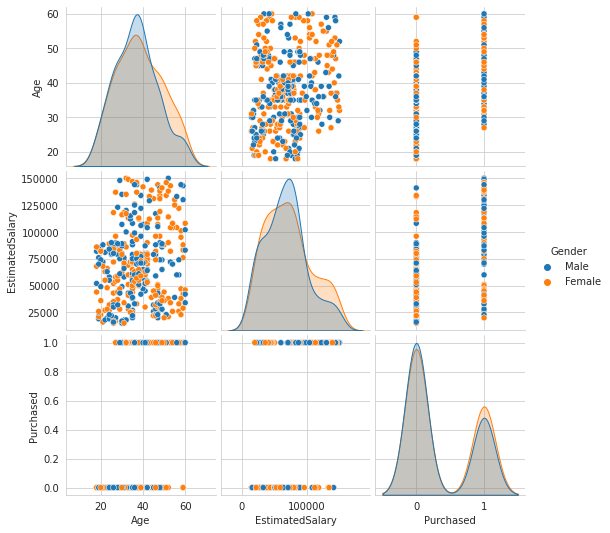

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_sn.drop("User ID", axis = 1), hue = "Gender")

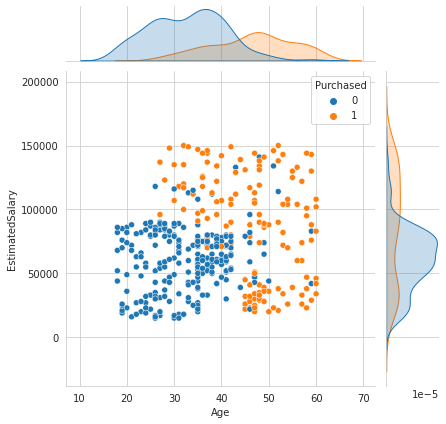

In [ ]:
sns.jointplot(x = "Age", y = "EstimatedSalary", hue = 'Purchased', 
              data = df_sn)

In [ ]:
df_sn['Gender'] = pd.get_dummies(df_sn['Gender'])[['Female']]

## Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_sn.iloc[:, 1:4]
X
y = df_sn['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(280, 3)
(120, 3)


In [ ]:
X_train

,Gender,Age,EstimatedSalary
157,0,29,75000
109,1,38,80000
17,0,45,26000
347,1,54,108000
24,0,46,23000
...,...,...,...
71,1,24,27000
106,1,26,35000
270,1,43,133000
348,0,39,77000


## Data Wrangling

- Here we scale the variables using StandardScaler, which normalizes variables

In [ ]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [ ]:
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

In [ ]:
X_train

array([[-1.02166316, -0.84252154,  0.1301563 ],
       [ 0.97879618,  0.04175763,  0.2777019 ],
       [-1.02166316,  0.72953032, -1.31579061],
       [ 0.97879618,  1.61380949,  1.10395728],
       [-1.02166316,  0.82778356, -1.40431797],
       [ 0.97879618, -1.43204099, -1.25677236],
       [-1.02166316, -0.05649561,  0.1301563 ],
       [-1.02166316,  0.43477059, -0.16493491],
       [ 0.97879618, -0.2530021 ,  0.01211982],
       [ 0.97879618,  1.31904976,  2.22530386],
       [-1.02166316,  0.14001087,  0.74984783],
       [ 0.97879618, -1.33378775,  0.54328399],
       [ 0.97879618,  2.00682245,  0.72033871],
       [-1.02166316, -1.23553451, -1.43382709],
       [-1.02166316,  0.33651735, -0.34198963],
       [-1.02166316, -0.94077478,  0.54328399],
       [ 0.97879618,  0.43477059,  0.2777019 ],
       [ 0.97879618,  0.43477059,  1.10395728],
       [ 0.97879618,  0.82778356,  0.74984783],
       [ 0.97879618,  0.9260368 ,  1.25150288],
       [ 0.97879618, -0.44950858, -1.256

## Fit logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logitmod = LogisticRegression()

In [ ]:
logitmod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model evaluations

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred_logit = logitmod.predict(X_test)
pred_logit

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
confusion_matrix(y_test, pred_logit)

array([[71,  2],
       [15, 32]])

In [ ]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



## KNN classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


### Parameter tuning for KNN

- Parameter tuning will be done using cross-validation
- Reestimate the models for the different values of tuning parameters
  - For KNN, try different values of _k_
- By default, for classification tasks
- For more information, see Chapter 5 of Gareth et al




In [ ]:
from sklearn.model_selection import GridSearchCV

### Final model